# Import

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()

In [2]:
app_train = pd.read_pickle("../data/processed/app_train_cleaned.pkl")

In [3]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 246 entries, SK_ID_CURR to FE_PAYMENT_RATE
dtypes: bool(132), float64(71), int64(43)
memory usage: 306.2 MB


In [4]:
# Load description file
feature_description = pd.read_csv(
    "../data/raw/HomeCredit_columns_description.csv", encoding="unicode_escape"
)
feature_description = feature_description.set_index("Row")[
    ["Description", "Special", "Table"]
]


def get_definition(feature):
    """
    Prints definition of a feature. Not sensitive to case.
    """
    with pd.option_context("display.max_colwidth", None):
        display(pd.DataFrame(feature_description.loc[feature.upper(), :]))

# Graphical analysis

## Numerical features

### Univariate analysis

#### Histograms

[]

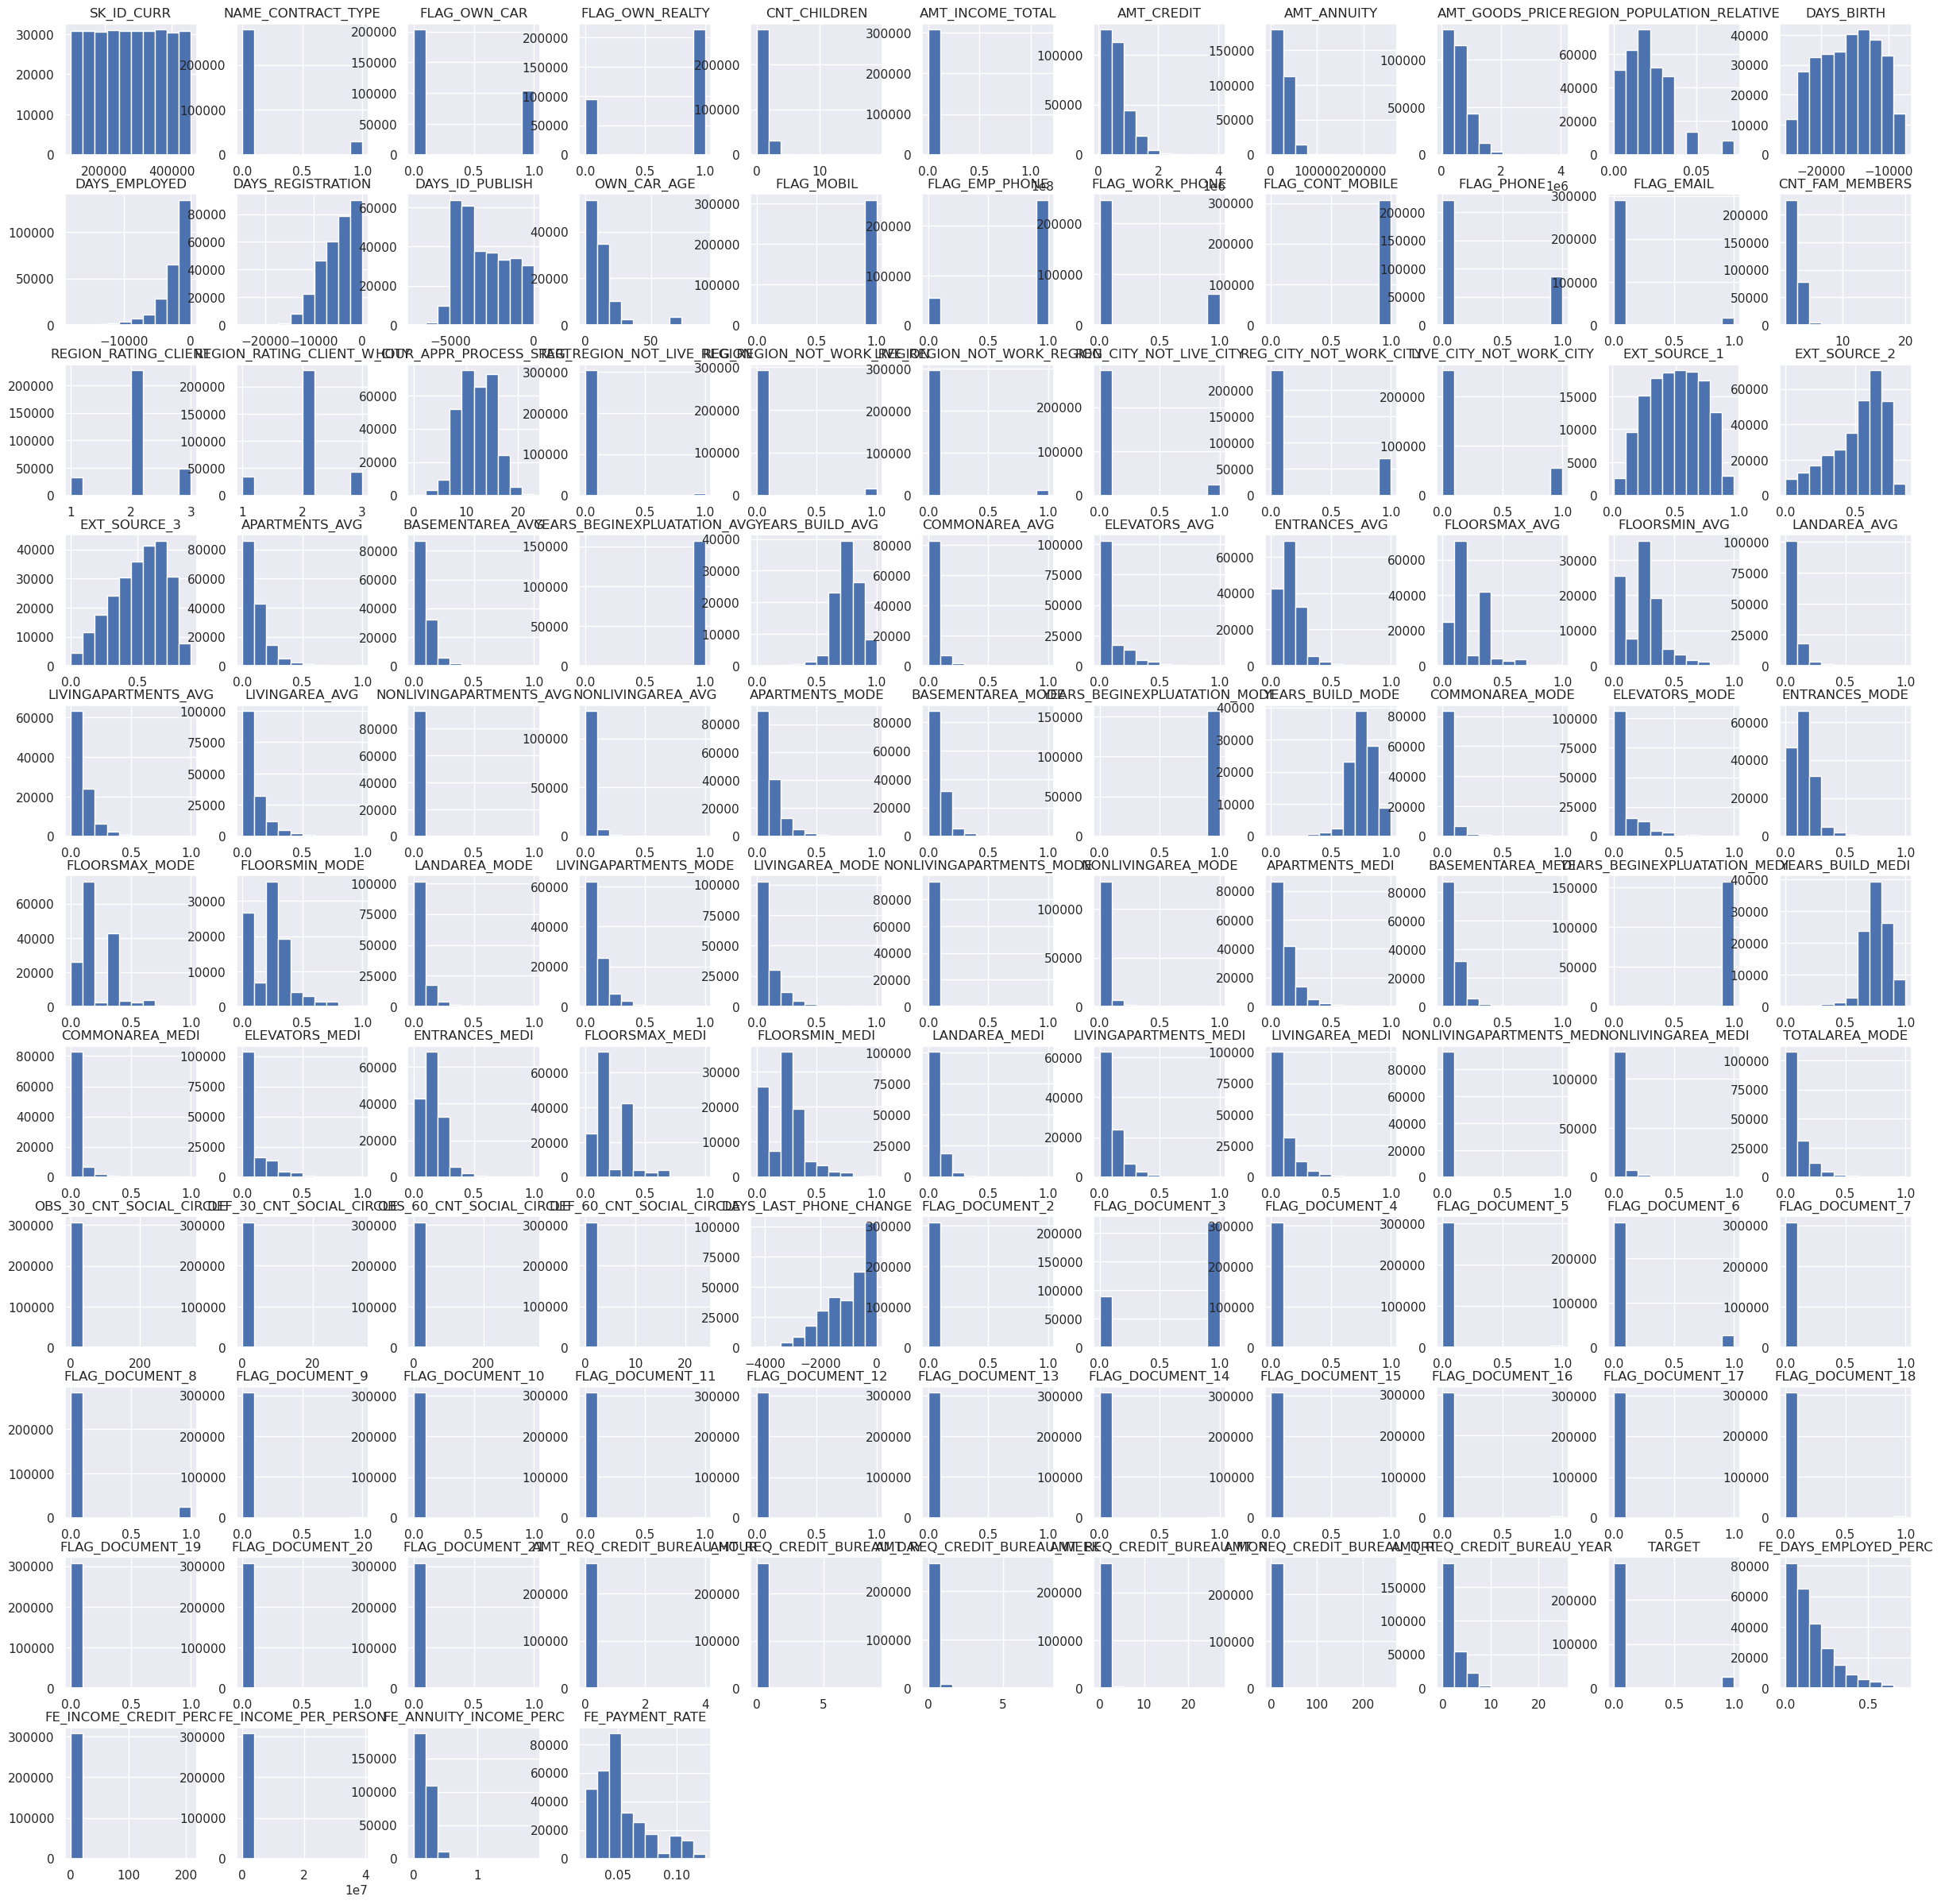

In [5]:
app_train.select_dtypes(exclude=bool).hist(figsize=(30, 30))
plt.plot()

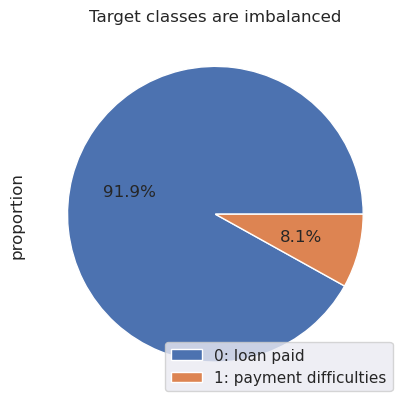

In [6]:
# Target
app_train.TARGET.value_counts(normalize=True).plot(
    kind="pie",
    autopct="%1.1f%%",
    labels=None,
    title="Target classes are imbalanced",
)
plt.legend(["0: loan paid", "1: payment difficulties"], loc="lower right")

#### Line Plots

### Bivariate analysis

#### Correlation Matrix

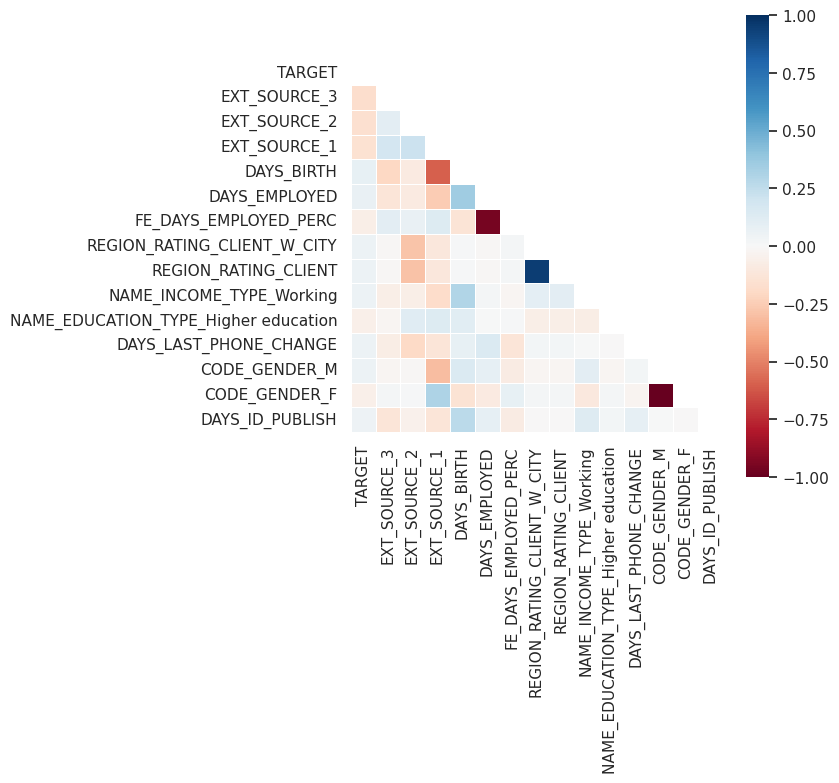

In [18]:
# Select only features with highest correlation to target
top_target_corr = (
    app_train.corrwith(app_train.TARGET)
    .abs()
    .sort_values(ascending=False)
    .head(15)
    .index
)

plt.figure(figsize=(6, 6))
sns.set_theme(style="white")  # for white background
sns.heatmap(
    app_train[top_target_corr].corr(),
    # shape
    mask=np.triu(app_train[top_target_corr].corr()),
    square=True,
    linewidths=0.6,
    # diverging colormap
    cmap=plt.cm.RdBu,
    center=0,
    vmin=-1,
    vmax=1,
    # annotations
    # annot=True,
    # annot_kws={"size": 20},
    # fmt=".2f",
    # cbar_kws={"shrink": 0.5},
)
plt.show();

In [9]:
get_definition("EXT_SOURCE_3")

,EXT_SOURCE_3
Description,Normalized score from external data source
Special,normalized
Table,application_{train|test}.csv


#### Distributions by target

/home/carl/anaconda3/envs/p7env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/carl/anaconda3/envs/p7env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/carl/anaconda3/envs/p7env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/carl/anaconda3/envs/p7env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

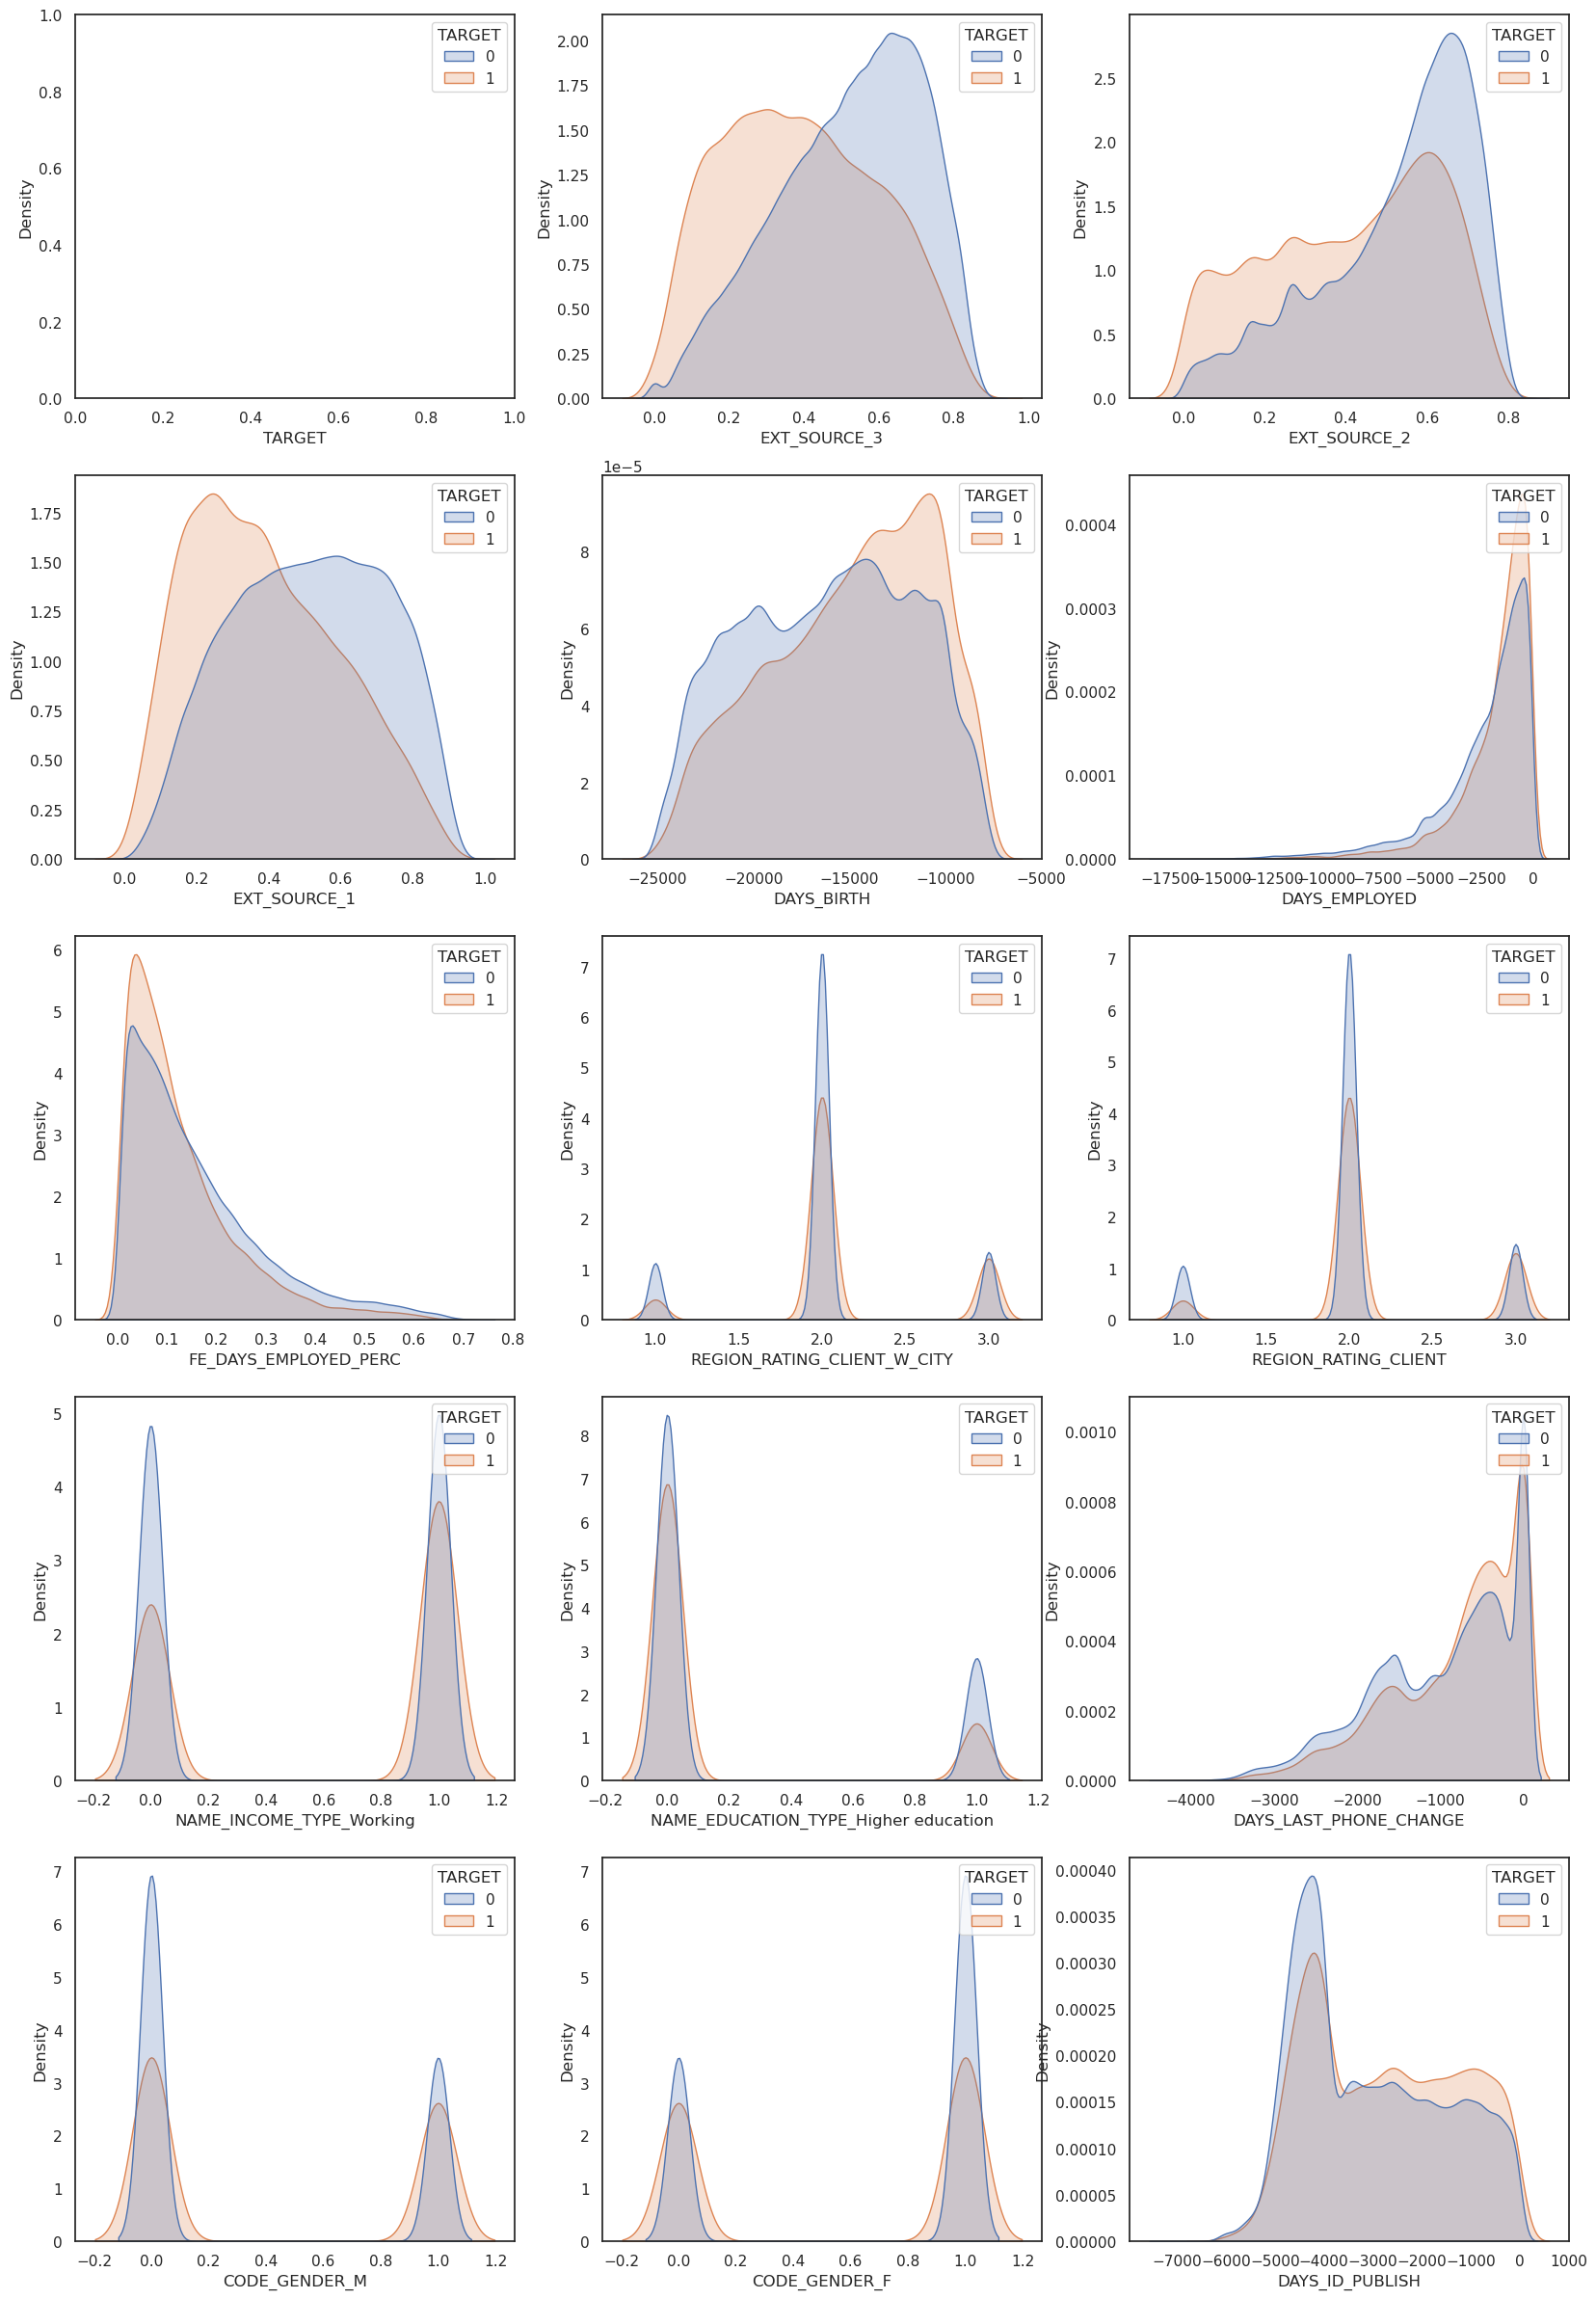

In [19]:
cols = 3
rows = int(len(top_target_corr) / cols)
fig, axes = plt.subplots(rows, cols, figsize=(20, 30))

for r in range(rows):
    for c in range(cols):
        sns.kdeplot(
            app_train[top_target_corr],
            x=top_target_corr[r * 3 + c],
            hue="TARGET",
            fill=True,
            common_norm=False,
            ax=axes[r, c],
            warn_singular=False,
        )